In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()   ## missing values in Age, Cabin and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_test.info()  ## missing values in Age, Cabin and Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# For emabrked it is only missing 2 values so we can replace missing values with most common values-mode
data_train.Embarked[data_train.Embarked.isnull()] = data_train.Embarked.dropna().mode().values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
# too much missing valuse for cabin...drop..
data_train = data_train.drop(['Cabin'], axis=1)
data_test = data_test.drop(['Cabin'], axis=1)

In [7]:
# Replace missing values of Age with random numbers between Mean+std and Mean-std

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


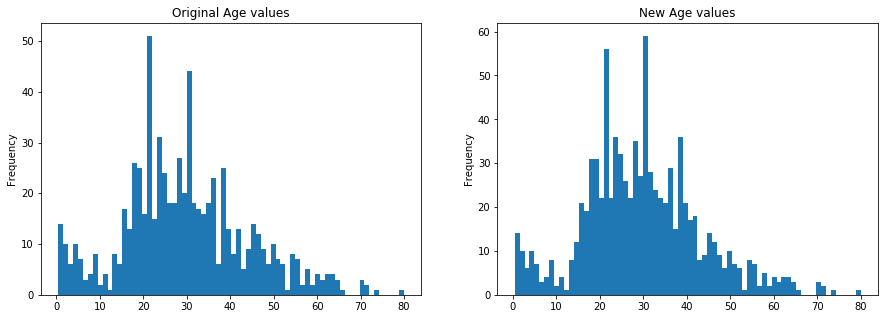

In [8]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
axis1.set_title('Original Age values')
axis2.set_title('New Age values')
average_age   = data_train["Age"].mean()
std_age       = data_train["Age"].std()
count_nan_age = data_train["Age"].isnull().sum()
rand = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)
data_train['Age'].plot(kind='hist', bins=70, ax=axis1)
data_train['Age'][data_train.Age.isnull()] = rand
data_train['Age'].plot(kind='hist', bins=70, ax=axis2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


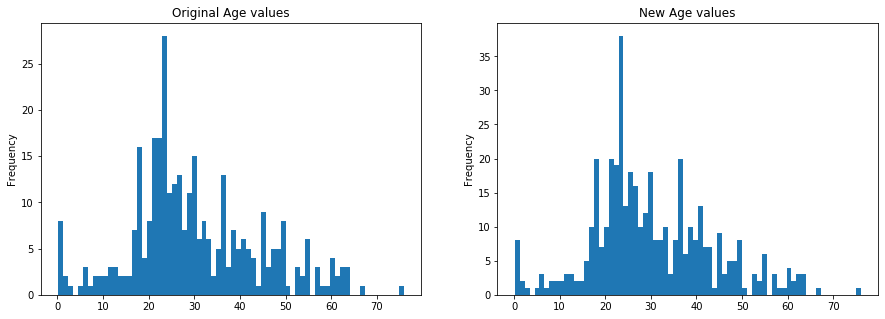

In [9]:
# Missing fare values in test set.. use median value

data_test["Fare"] = data_test["Fare"].fillna(data_test["Fare"].median())

# Replace missing age values in test set in the same way 
fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))
axis3.set_title('Original Age values')
axis4.set_title('New Age values')
average_age_test   = data_test["Age"].mean()
std_age_test       = data_test["Age"].std()
count_nan_age_test = data_test["Age"].isnull().sum()
rand_test = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)
data_test['Age'].plot(kind='hist', bins=70, ax=axis3)
data_test['Age'][data_test.Age.isnull()] = rand_test
data_test['Age'].plot(kind='hist', bins=70, ax=axis4)
plt.show()

In [10]:
#Data Observation

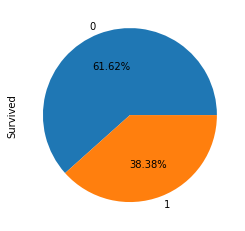

In [11]:

data_train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

# most people died 


In [12]:
data_train.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

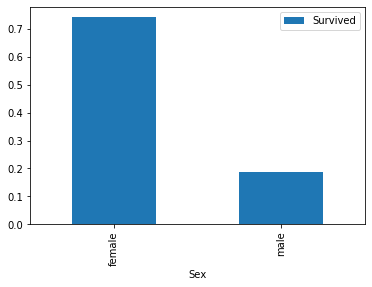

In [13]:
data_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

#most female survived

In [14]:
data_train.groupby(['Pclass','Survived'])['Pclass'].count()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

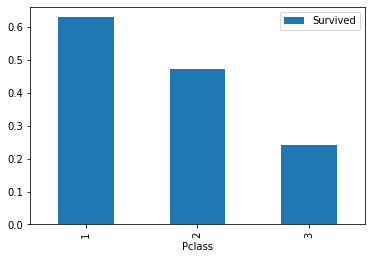

In [15]:

data_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

# first class people survived the most while thrid class died the most

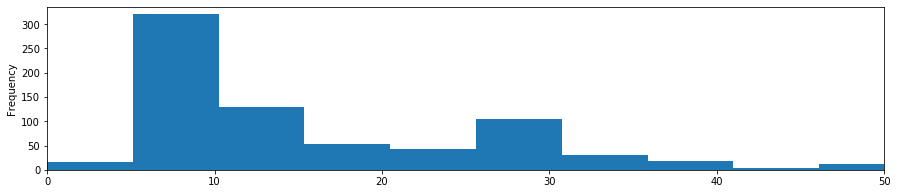

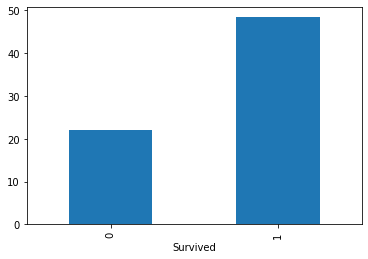

In [16]:
fare_not_survived = data_train["Fare"][data_train["Survived"] == 0]
fare_survived     = data_train["Fare"][data_train["Survived"] == 1]
avgerage_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
data_train['Fare'].plot(kind='hist', figsize=(15,3), bins=100, xlim=(0,50))
avgerage_fare.index.names =  ["Survived"]
avgerage_fare.plot(kind='bar', legend=False)
plt.show()
# Fare Distribution and avergae fare price who survive

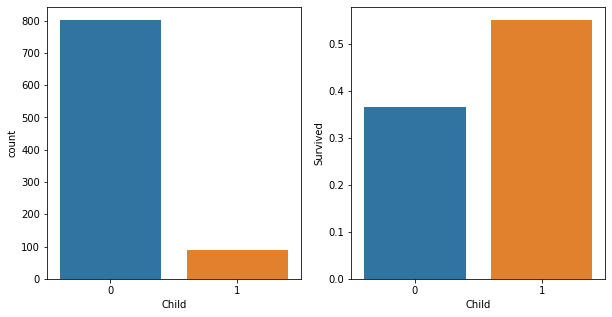

In [17]:
def is_child(age):   # define age<16 is child and we can see not many child                  
                      # but survival rate is more than 50% for child !
    if age < 16:
        return 1
    else:
        return 0
data_train['Child'] = data_train['Age'].apply(is_child) 
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Child', data=data_train, ax=axis1)
child_survive = data_train[["Child", "Survived"]].groupby(['Child'],as_index=False).mean()
sns.barplot(x='Child', y='Survived', data=child_survive, ax=axis2)
plt.show()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Embarked, dtype: int64

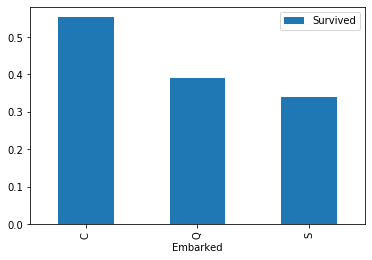

In [18]:
data_train[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
data_train.groupby(['Embarked','Survived'])['Embarked'].count()

# Embark info. C seems to have more survival but C also has most people...

In [19]:
# get dummy variables for Embarked,Sex
embark_dummies_train  = pd.get_dummies(data_train['Embarked'])
data_train = data_train.join(embark_dummies_train)
data_train.drop(['Embarked'], axis=1,inplace=True)

embark_dummies_test  = pd.get_dummies(data_test['Embarked'])
data_test = data_test.join(embark_dummies_test)
data_test.drop(['Embarked'], axis=1,inplace=True)

In [20]:
embark_dummies_train = data_train[['S', 'C', 'Q']]
embark_dummies_train.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
embark_dummies_test = data_test[['S', 'C', 'Q']]
embark_dummies_test.head()

,S,C,Q
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [22]:
sex_dummies_train  = pd.get_dummies(data_train['Sex'])
data_train = data_train.join(sex_dummies_train)
data_train.drop(['Sex'], axis=1,inplace=True)

In [23]:
sex_dummies_train = data_train[['male', 'female']]
sex_dummies_train.head()

,male,female
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [24]:
sex_dummies_test  = pd.get_dummies(data_test['Sex'])
data_test = data_test.join(sex_dummies_test)
data_test.drop(['Sex'], axis=1,inplace=True)

In [25]:
sex_dummies_test = data_test[['male', 'female']]
sex_dummies_test.head()

,male,female
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [26]:
# drop passenger ID, names, tickets and the child label we just created

In [27]:
data_train = data_train.drop(['PassengerId'], axis=1)

data_train = data_train.drop(['Name'], axis=1)
data_test = data_test.drop(['Name'], axis=1)
data_train = data_train.drop(['Ticket'], axis=1)
data_test = data_test.drop(['Ticket'], axis=1)
data_train = data_train.drop(['Child'], axis=1)

In [28]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [29]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,892,3,34.5,0,0,7.8292,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,1,0


In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=data_train[["Pclass","Age","SibSp","Parch","Fare","C","Q","S","female","male"]]
y_train=data_train.Survived
X_test=data_test[["Pclass","Age","SibSp","Parch","Fare","C","Q","S","female","male"]]
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [31]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5,10,15,20], 'max_features': [1,3,5,10], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10], "criterion": ["gini", "entropy"]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 15,20], 'max_features': [1,3,5,10],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10], "criterion": ["gini", "entropy"]}
  ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 15}


In [34]:
final_model = grid_search.best_estimator_

y_pred = final_model.predict(X_test)

In [35]:
pd.DataFrame({'PassengerId':data_test.PassengerId, 'Survived':y_pred}).set_index('PassengerId').to_csv('sub.csv')

In [36]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print('Mean Trainning set accuracy',accuracies.mean())
print('Mean Trainning set std',accuracies.std())

Mean Trainning set accuracy 0.8115226433769642
Mean Trainning set std 0.031226653875970702


In [49]:
## Try Kernal SVM

from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf', random_state = 0)
svm_clf.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.0001,0.001,0.01,0.1, 0.2]}]

grid_search = GridSearchCV(estimator = svm_clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)



print(grid_search.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [50]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = svm_clf, X = X_train, y = y_train, cv = 5)
print('Mean Trainning set accuracy',accuracies.mean())
print('Mean Trainning set std',accuracies.std())

y_pred=grid_search.best_estimator_.predict(X_test)

Mean Trainning set accuracy 0.8238259840193602
Mean Trainning set std 0.02097822638547679


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [51]:
pd.DataFrame({'PassengerId':data_test.PassengerId, 'Survived':y_pred}).set_index('PassengerId').to_csv('sub.csv')

In [46]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression(random_state = 0)
lg_clf.fit(X_train, y_train)

parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1'], 'solver': [ 'liblinear', 'saga']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l2'], 'solver': ['lbfgs','newton-cg','sag']}]

grid_search = GridSearchCV(estimator = lg_clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)



print(grid_search.best_params_)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
accuracies = cross_val_score(estimator = grid_search.best_estimator_, X = X_train, y = y_train, cv = 5)
print('Mean Trainning set accuracy',accuracies.mean())
print('Mean Trainning set std',accuracies.std())

Mean Trainning set accuracy 0.7912978533484976
Mean Trainning set std 0.021859160634289304


In [48]:
y_pred=grid_search.best_estimator_.predict(X_test)

pd.DataFrame({'PassengerId':data_test.PassengerId, 'Survived':y_pred}).set_index('PassengerId').to_csv('sub.csv')